In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('input/employee.csv')
# data.shape
# data.describe()
# data.describe(include='object')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
data.head(3).style.format({'DailyRate': '${:5}',
                            'MonthlyIncome': '${:5}'} )

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,$ 1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,$ 5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,$ 279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,$ 5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,$ 1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,$ 2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [3]:
data.head(5).style.highlight_max(color = 'lightgreen')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
data.iloc[3]

Age                                             33
Attrition                                       No
BusinessTravel                   Travel_Frequently
DailyRate                                     1392
Department                  Research & Development
DistanceFromHome                                 3
Education                                        4
EducationField                       Life Sciences
EmployeeCount                                    1
EmployeeNumber                                   5
EnvironmentSatisfaction                          4
Gender                                      Female
HourlyRate                                      56
JobInvolvement                                   3
JobLevel                                         1
JobRole                         Research Scientist
JobSatisfaction                                  3
MaritalStatus                              Married
MonthlyIncome                                 2909
MonthlyRate                    

In [5]:
data.iloc[5:7]
# data.iloc[5:7,0:2]
# data.iloc[:1000:-1]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


In [6]:
#Defining the function for binning the age variable.

def age_cat(x):
    if x>20 and x<30:
        return '20-30'
    elif x>30 and x<40:
        return '30-40'
    elif x>40 and x<50:
        return '40-50'
    else:
        return '50-60'
    
data['Age'].apply(age_cat).value_counts()

30-40    562
50-60    318
20-30    298
40-50    292
Name: Age, dtype: int64

In [7]:
#Defining the function which will bin the numerical DistanceFromHome variable into Categories

def distance_from_home(x):
    if x <= 2:
        return 'Near'
    elif x > 2 and x <=5:
        return 'Far'
    elif x >5:
        return 'Extremely Far'

data['DistanceFromHome'].apply(distance_from_home).value_counts()

Extremely Far    838
Near             419
Far              213
Name: DistanceFromHome, dtype: int64

In [8]:
#Defining function

def experience_categorization(x):
    if x <= 2:
        return 'novice'
    elif x > 2 and x <= 5:
        return 'intermediate'
    elif x > 5:
        return 'experienced'
    
data['TotalWorkingYears'].apply(experience_categorization).value_counts()

experienced     1154
intermediate     193
novice           123
Name: TotalWorkingYears, dtype: int64

## Groupby

In [9]:
#Grouping the employee details by Department
data.groupby(data['Department']).agg('mean')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,
Human Resources,37.809524,751.539683,8.698413,2.968254,1.0,1205.269841,2.682540,64.301587,2.746032,2.031746,...,2.888889,80.0,0.777778,11.555556,2.555556,2.920635,7.238095,3.539683,1.777778,3.666667
Research & Development,37.042664,806.851197,9.144641,2.899063,1.0,1006.503642,2.744017,66.167534,2.741935,1.977107,...,2.708637,80.0,0.804370,11.342352,2.792924,2.725286,6.864724,4.155047,2.137357,4.084287
Sales,36.542601,800.275785,9.365471,2.934978,1.0,1038.946188,2.679372,65.520179,2.701794,2.255605,...,2.695067,80.0,0.773543,11.105381,2.847534,2.816143,7.284753,4.486547,2.354260,4.271300


In [10]:
data[['Age','MonthlyIncome','Department']].groupby(data['Department']).agg('mean')

,Age,MonthlyIncome
Department,,
Human Resources,37.809524,6654.507937
Research & Development,37.042664,6281.252862
Sales,36.542601,6959.172646


In [11]:
data[['Age','Department']].groupby(data['Department']).agg('median')
# data[['Age','Department']].groupby(data['Department']).agg('mean')
# data[['Age','Department']].groupby(data['Department']).agg('sum')
# data[['Age','Department']].groupby(data['Department']).agg('min')
# data[['Age','Department']].groupby(data['Department']).agg('max')
# data[['Age','Department']].groupby(data['Department']).agg('var')
# data[['Age','Department']].groupby(data['Department']).agg('std')
# data[['Age','Department']].groupby(data['Department']).agg('count')
# data[['Age','Department']].groupby(data['Department']).agg('nunique')

,Age
Department,
Human Resources,37
Research & Development,36
Sales,35


In [12]:
# data[['Age','Department']].groupby(data['Department']).agg('mean')
data[['Age','Department']].groupby(data['Department']).agg('mean').style.background_gradient(cmap = 'copper')
# data[['Age','Department']].groupby(data['Department']).agg('mean').style.background_gradient(cmap = 'Reds')

,Age
Department,
Human Resources,37.809524
Research & Development,37.042664
Sales,36.542601


In [13]:
data[['Age','Department']].groupby(data['Department']).agg(['min','max'])

Age                  Department                        
                       min max                     min                     max
Department                                                                    
Human Resources         19  59         Human Resources         Human Resources
Research & Development  18  60  Research & Development  Research & Development
Sales                   18  60                   Sales                   Sales

In [14]:
data.pivot_table(values ='Age', index = 'Department', aggfunc = ['min','max'])

,min,max
,Age,Age
Department,,
Human Resources,19,59
Research & Development,18,60
Sales,18,60


In [15]:
data2 = data.loc[data.groupby(data['Department'])['MonthlyIncome'].idxmax()][['EmployeeNumber','Department','MonthlyIncome']]
data2

,EmployeeNumber,Department,MonthlyIncome
956,1338,Human Resources,19717
190,259,Research & Development,19999
918,1282,Sales,19847


In [16]:
data2 = data[['Attrition','Department','MonthlyIncome','Age']].groupby([data['Attrition'],data['Department']]).agg('mean')
data2

MonthlyIncome        Age
Attrition Department                                      
No        Human Resources           7345.980392  39.627451
          Research & Development    6630.326087  37.615942
          Sales                     7232.240113  37.135593
Yes       Human Resources           3715.750000  30.083333
          Research & Development    4108.075188  33.473684
          Sales                     5908.456522  34.260870

In [17]:
for index, row in data2.iterrows():
    print("Index: {} Rows: {}".format(index, row.values))

Index: ('No', 'Human Resources') Rows: [7345.98039216   39.62745098]
Index: ('No', 'Research & Development') Rows: [6630.32608696   37.61594203]
Index: ('No', 'Sales') Rows: [7232.24011299   37.13559322]
Index: ('Yes', 'Human Resources') Rows: [3715.75         30.08333333]
Index: ('Yes', 'Research & Development') Rows: [4108.07518797   33.47368421]
Index: ('Yes', 'Sales') Rows: [5908.45652174   34.26086957]


In [18]:
for row in data2.itertuples():
    print(row)

Pandas(Index=('No', 'Human Resources'), MonthlyIncome=7345.980392156863, Age=39.627450980392155)
Pandas(Index=('No', 'Research & Development'), MonthlyIncome=6630.326086956522, Age=37.61594202898551)
Pandas(Index=('No', 'Sales'), MonthlyIncome=7232.24011299435, Age=37.13559322033898)
Pandas(Index=('Yes', 'Human Resources'), MonthlyIncome=3715.75, Age=30.083333333333332)
Pandas(Index=('Yes', 'Research & Development'), MonthlyIncome=4108.075187969925, Age=33.473684210526315)
Pandas(Index=('Yes', 'Sales'), MonthlyIncome=5908.45652173913, Age=34.26086956521739)


In [19]:
# lets define a function to divide the Daily Rate by 100
def function(x):
    return x/10

data['DailyRate'] = data['DailyRate'].map(function)
data['DailyRate']

0       110.2
1        27.9
2       137.3
3       139.2
4        59.1
        ...  
1465     88.4
1466     61.3
1467     15.5
1468    102.3
1469     62.8
Name: DailyRate, Length: 1470, dtype: float64

In [20]:
data[['DailyRate','MonthlyRate']].apply(function).head()

,DailyRate,MonthlyRate
0,11.02,1947.9
1,2.79,2490.7
2,13.73,239.6
3,13.92,2315.9
4,5.91,1663.2


In [21]:
data['MonthlyRate'] = data['MonthlyRate'].apply(lambda x: x/10)
data['MonthlyRate']

0       1947.9
1       2490.7
2        239.6
3       2315.9
4       1663.2
         ...  
1465    1229.0
1466    2145.7
1467     517.4
1468    1324.3
1469    1022.8
Name: MonthlyRate, Length: 1470, dtype: float64

<AxesSubplot:xlabel='Department'>

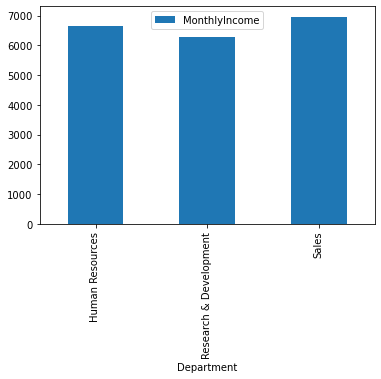

In [22]:
data[['MonthlyIncome','Department']].groupby(data['Department']).agg('mean').plot(kind = 'bar')
# data[['MonthlyIncome','Department']].groupby(data['Department']).agg('mean').plot(kind = 'line')
# data[['MonthlyIncome','Department']].groupby(data['Department']).agg('mean').plot(kind = 'area')

In [23]:
# let's make a pivot table for the department and their mean ages

data.pivot_table(values ='MonthlyIncome', index = 'Department', aggfunc = 'mean')

,MonthlyIncome
Department,
Human Resources,6654.507937
Research & Development,6281.252862
Sales,6959.172646


In [24]:
# let's make a pivot table for the department and their mean ages

data.pivot_table(values ='MonthlyIncome', index = 'Department', aggfunc = 'mean').style.background_gradient(cmap ='copper')


,MonthlyIncome
Department,
Human Resources,6654.507937
Research & Development,6281.252862
Sales,6959.172646


<AxesSubplot:xlabel='Department'>

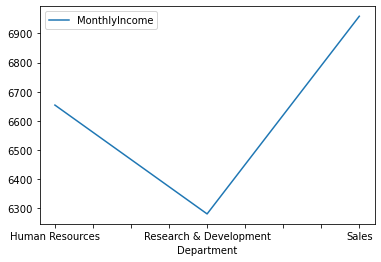

In [25]:
# let's make a pivot table for the department and their mean ages

data.pivot_table(values ='MonthlyIncome', index = 'Department', aggfunc = 'mean').plot(kind = 'line')

## Simple Filtering Operations

In [26]:
# Employees who are working more than 35 years at the company
data[data['YearsAtCompany'] > 35]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
98,58,No,Travel_Rarely,68.2,Sales,10,4,Medical,1,131,...,3,80,0,38,1,2,37,10,1,8
126,58,Yes,Travel_Rarely,14.7,Research & Development,23,4,Medical,1,165,...,4,80,1,40,3,2,40,10,15,6
270,55,No,Travel_Rarely,45.2,Research & Development,1,3,Medical,1,374,...,3,80,0,37,2,3,36,10,4,13
1116,55,No,Travel_Rarely,68.5,Sales,26,5,Marketing,1,1578,...,3,80,1,36,3,3,36,6,2,13


In [27]:
# employees who get more than 19000 dollars
data[data['MonthlyIncome'] > 19000]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,No,Travel_Rarely,128.2,Research & Development,5,3,Other,1,32,...,4,80,1,26,3,2,14,13,4,8
45,41,Yes,Travel_Rarely,136.0,Research & Development,12,3,Technical Degree,1,58,...,4,80,0,23,0,3,22,15,15,8
123,51,No,Travel_Rarely,68.4,Research & Development,6,3,Life Sciences,1,162,...,3,80,0,23,5,3,20,18,15,15
165,50,No,Travel_Rarely,145.2,Research & Development,11,3,Life Sciences,1,226,...,2,80,0,21,5,3,5,4,4,4
186,40,No,Travel_Rarely,98.9,Research & Development,4,1,Medical,1,253,...,2,80,1,21,2,3,20,8,9,9
190,52,No,Travel_Rarely,69.9,Research & Development,1,4,Life Sciences,1,259,...,1,80,1,34,5,3,33,18,11,9
231,42,No,Travel_Rarely,53.2,Research & Development,4,2,Technical Degree,1,319,...,4,80,0,22,3,3,22,17,11,15
233,50,No,Travel_Rarely,85.4,Sales,1,4,Medical,1,323,...,3,80,1,32,3,2,7,0,0,6
237,52,No,Non-Travel,77.1,Sales,2,4,Life Sciences,1,329,...,4,80,0,33,2,4,33,7,15,12
244,45,No,Travel_Rarely,25.2,Research & Development,1,3,Other,1,336,...,3,80,1,25,2,3,24,0,1,7


In [28]:
# Filter all the employees who are getting lesser than average salary even after working for more than 10 years in the same role.
avg=data['MonthlyIncome'].mean()
data[(data['YearsInCurrentRole']>10) & (data['MonthlyIncome']<avg)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
76,35,No,Travel_Rarely,77.6,Sales,1,4,Marketing,1,100,...,2,80,0,16,2,3,15,13,2,8
83,38,No,Non-Travel,57.3,Research & Development,6,3,Medical,1,107,...,4,80,3,17,3,3,13,11,1,9
103,34,No,Travel_Rarely,66.5,Research & Development,6,4,Other,1,138,...,3,80,0,16,3,3,16,13,2,10
137,39,No,Travel_Rarely,132.9,Sales,4,4,Life Sciences,1,182,...,3,80,1,17,1,4,15,11,5,9
220,36,No,Travel_Rarely,139.6,Research & Development,5,2,Life Sciences,1,304,...,4,80,0,16,3,4,13,11,3,7
269,36,No,Travel_Rarely,140.3,Research & Development,6,3,Life Sciences,1,373,...,3,80,1,16,4,3,15,13,10,11
281,42,No,Travel_Rarely,63.5,Sales,1,1,Life Sciences,1,387,...,3,80,0,20,3,3,20,16,11,6
285,37,No,Travel_Rarely,137.2,Research & Development,1,3,Life Sciences,1,391,...,2,80,0,17,3,3,17,12,5,7
319,32,No,Travel_Rarely,58.8,Sales,8,2,Technical Degree,1,436,...,4,80,0,13,2,3,13,12,11,9
398,37,No,Non-Travel,106.3,Research & Development,25,5,Medical,1,529,...,1,80,2,15,2,3,13,11,10,7


In [29]:
# lets find out employees who do not travel or travel frequently and get more than 15000 dollars monthly salary 
x = data[(data['BusinessTravel'] == 'Non-Travel') | (data['BusinessTravel'] == 'Travel_Frequently')]
x[data['MonthlyIncome'] > 15000][['BusinessTravel','MonthlyIncome']].head()

<ipython-input-29-e18475c963fd>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x[data['MonthlyIncome'] > 15000][['BusinessTravel','MonthlyIncome']].head()


,BusinessTravel,MonthlyIncome
105,Non-Travel,18844
106,Travel_Frequently,18172
112,Non-Travel,17328
119,Travel_Frequently,16959
147,Travel_Frequently,17181


In [30]:
# let's first filter all the employees from sales department having more than 15000 dollars monthly salary
data[(data['Department'] == 'Sales') & (data['MonthlyIncome'] > 15000)].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,53,No,Travel_Rarely,121.9,Sales,2,4,Life Sciences,1,23,...,3,80,0,31,3,3,25,8,3,7
29,46,No,Travel_Rarely,70.5,Sales,2,4,Marketing,1,38,...,4,80,0,22,2,2,2,2,2,1
119,43,No,Travel_Frequently,39.4,Sales,26,2,Life Sciences,1,158,...,4,80,2,25,3,4,25,12,4,12
233,50,No,Travel_Rarely,85.4,Sales,1,4,Medical,1,323,...,3,80,1,32,3,2,7,0,0,6
235,43,No,Travel_Rarely,103.4,Sales,16,3,Marketing,1,327,...,3,80,1,22,3,3,17,13,1,9


In [31]:
# now we want to aggregate this date based on their attrition
x = data[(data['Department'] == 'Sales') & (data['MonthlyIncome'] > 15000)]
x[['Attrition','MonthlyIncome']].groupby(['Attrition']).mean()

,MonthlyIncome
Attrition,
No,17631.827586
Yes,19334.500000


### Univariate Analysis on Numerical Variables

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

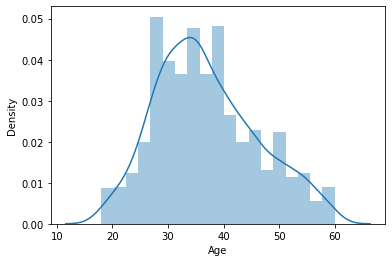

In [32]:
#Distributiong of Age variable
sns.distplot(data['Age'])

### Univariate Analysis on Categorical Variables

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

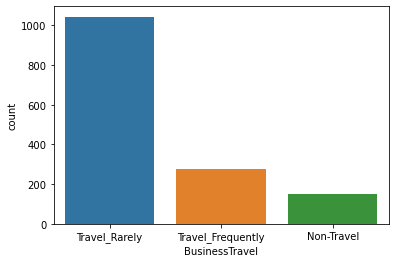

In [33]:
sns.countplot(data['BusinessTravel'])

### Correlation Heatmap

<AxesSubplot:>

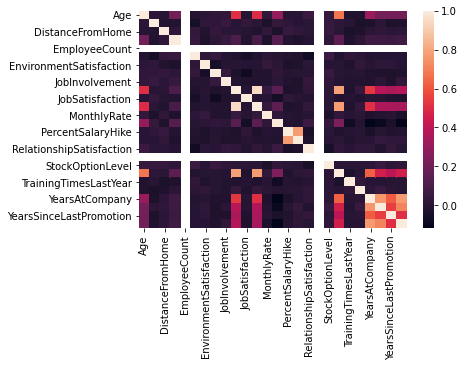

In [34]:
sns.heatmap(data.corr())

### Bar plot with Extra Variable

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

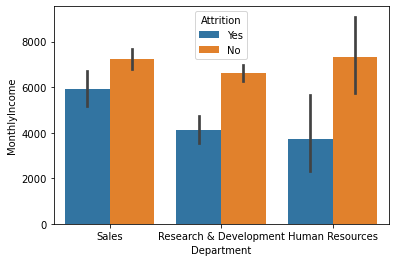

In [35]:
sns.barplot(data['Department'], data['MonthlyIncome'], data['Attrition'])

## CrossTabulation

In [36]:
pd.crosstab(data['Attrition'], data['Department'])

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


<AxesSubplot:xlabel='Attrition'>

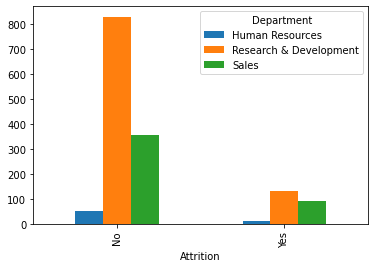

In [37]:
pd.crosstab(data['Attrition'], data['Department']).plot(kind = 'bar')

<AxesSubplot:xlabel='Attrition'>

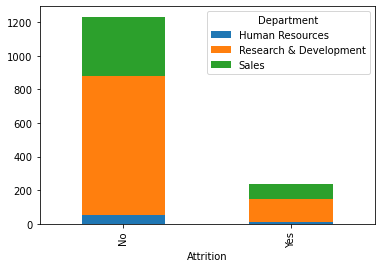

In [38]:
pd.crosstab(data['Attrition'], data['Department']).plot(kind = 'bar', stacked = True)

In [39]:
pd.crosstab(data['EducationField'], data['Department'])

Department,Human Resources,Research & Development,Sales
EducationField,,,
Human Resources,27,0,0
Life Sciences,16,440,150
Marketing,0,0,159
Medical,13,363,88
Other,3,64,15
Technical Degree,4,94,34


In [40]:
pd.crosstab(data['EducationField'], data['Department']).style.bar(color=['gold'])

Department,Human Resources,Research & Development,Sales
EducationField,,,
Human Resources,27,0,0
Life Sciences,16,440,150
Marketing,0,0,159
Medical,13,363,88
Other,3,64,15
Technical Degree,4,94,34


In [41]:
data.groupby(['Department','JobRole'])[['MonthlyIncome','MonthlyRate','HourlyRate']].agg(['max','min','mean'])
data.groupby(['Department','JobRole'])[['MonthlyIncome','MonthlyRate','HourlyRate']].agg(['max','min','mean']).style.background_gradient(cmap='copper')

## ipywidgets-employee

In [42]:
#importing libraries
import pandas as pd
from ipywidgets import interact

In [43]:
@interact
def groupby(column=list(data.select_dtypes('object').columns)):
    return data[['Age',column]].groupby([data[column]]).agg(['mean'])

interactive(children=(Dropdown(description='column', options=('Attrition', 'BusinessTravel', 'Department', 'Ed…

In [44]:
@interact
def groupby(column = list(data.select_dtypes('object').columns),
            index = list(data.select_dtypes('number').columns)):
    return data[[index, column]].groupby([data[column]]).agg(['mean'])

interactive(children=(Dropdown(description='column', options=('Attrition', 'BusinessTravel', 'Department', 'Ed…

In [45]:
@interact
def filter_emp(column='MonthlyIncome',salary=19900):
    return data[data[column]>salary]

interactive(children=(Text(value='MonthlyIncome', description='column'), IntSlider(value=19900, description='s…

In [46]:
@interact
def filter_emp(column='MonthlyIncome',salary=19900):
    return data[data[column]>salary][['EmployeeNumber','EducationField','Department','MonthlyIncome']]

interactive(children=(Text(value='MonthlyIncome', description='column'), IntSlider(value=19900, description='s…

In [47]:
@interact
def filter_emp(column='MonthlyIncome',salary=19900):
    return data[data[column]>salary][['EmployeeNumber',
                                      'EducationField',
                                      'Department',
                                      'MonthlyIncome']].sort_values(by='MonthlyIncome',ascending=False)

interactive(children=(Text(value='MonthlyIncome', description='column'), IntSlider(value=19900, description='s…

## Remove unnecessary columns

In [48]:
#All the three columns has unique value for the whole dataset. So these columns won't make any difference to the
#target variable. Hence, we drop these three variables from our dataset.

data=data.drop(['StandardHours','EmployeeCount','Over18'],axis=1)
data['EmployeeNumber'].nunique()

1470

In [49]:
#There are 1470 rows in the dataset and 1470 different values in the EmployeeNumber column. So, there is no point
#of keeping this variable as it has different values for different employess.

data=data.drop('EmployeeNumber',axis=1)

In [50]:
#variables Job Level and Monthly Income are highly correlated with a correlation of 0.95 and 
#the variable years in company is highly correlated with years in current role and years with current manager.

data=data.drop(['JobLevel','YearsInCurrentRole','YearsWithCurrManager'],axis=1)
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

<AxesSubplot:>

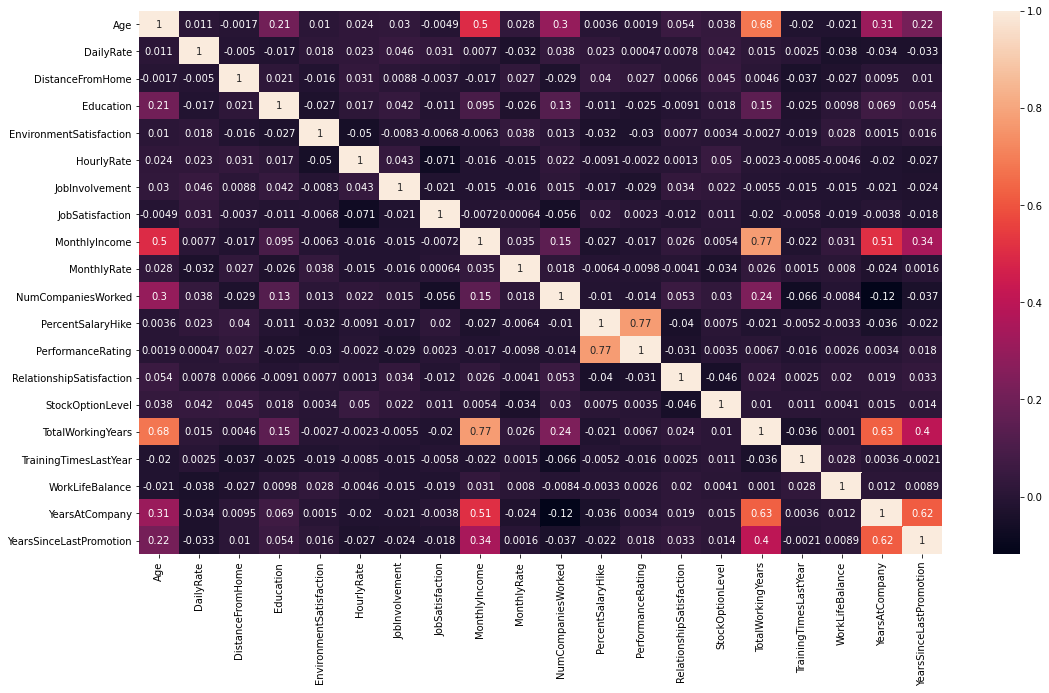

In [51]:
#Finding the correlation among all the variables 

plt.rcParams['figure.figsize']=(18,10)
sns.heatmap(data.corr(),annot=True)